# Modul 8 Persamaan Diferensial Numerik: PDP Parabolik (persamaan panas/difusi)

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

Bentuk umum PDP parabolik (lebih tepatnya persamaan panas atau persamaan difusi) bisa ditulis sebagai berikut:

$$\frac{\partial u}{\partial t} (x,t) = \alpha^2 \frac{\partial^2 u}{\partial x^2}(x,t), \quad 0 < x < l, \quad 0 < t < T,$$

dengan syarat batas serta nilai awal

$$u(0,t) = u(l,t) = 0, \quad 0 < t < T, \quad \text{dan} \quad u(x,0) = f(x), \quad 0 \le x \le l$$

*Step size* dalam variabel $x$ bisa ditulis $h = \Delta x = l/m$ untuk suatu bilangan bulat positif $m$.

*Step size* dalam variabel $t$ bisa ditulis $k = \Delta t = T/N$ untuk suatu bilangan bulat positif $N$.

## Metode *Forward Difference* / Metode Eksplisit untuk PDP Parabolik

### Ide utama

Metode *forward difference* didasari oleh perumusan *finite difference* berikut,

$$\left(1 - 2 \lambda\right)w_{i,j} - w_{i,j+1} + \lambda \left(w_{i+1,j} + w_{i-1,j}\right) = 0$$

atau bisa ditulis

$$w_{i,j+1} = \left(1 - 2 \lambda\right)w_{i,j} + \lambda \left(w_{i+1,j} + w_{i-1,j}\right)$$

yang kemudian diubah ke dalam bentuk matriks.

Dalam bentuk matriks, langkah-langkah metode *forward difference* bisa ditulis sebagai berikut.

1. Misalkan

$$\lambda = \alpha^2 \left(\frac{k}{h^2}\right)$$

2. Susun matriks tridiagonal $A$ berukuran $(m-1) \times (m-1)$ sebagai berikut:

$$A = \begin{bmatrix}
    (1-2\lambda) & \lambda & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
    \lambda & (1-2\lambda) & \lambda & 0 & \ddots & \ddots & \ddots & \vdots \\
    0 & \lambda & (1-2\lambda) & \lambda & 0 & \ddots & \ddots & \vdots \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    0 & \cdots & \cdots & \cdots & 0 & \lambda & (1-2\lambda) & \lambda \\
    0 & \cdots & \cdots & \cdots & \cdots & 0 & \lambda & (1-2\lambda)
\end{bmatrix}$$

3. Siapkan matriks grid $w$ berukuran $(m+1) \times (N+1)$ untuk menyimpan $w_{i,j}$.

    Isi semua dengan nol terlebih dahulu, atau setidaknya, pastikan baris pertama dan baris terakhir terisi nol semua (sesuai syarat batas).

    Misalkan kolom ke-$j$, kecuali baris pertama dan baris terakhir, ditulis $\textbf{w}^{(j)}$, yaitu

    $$\textbf{w}^{(j)} = (w_{2,j}, w_{3,j}, \dots, w_{m,j})$$

4. Isi kolom pertama $w$ berdasarkan nilai awal, yaitu

    $$w_{i,1} = f(x_i)$$

    atau bisa ditulis

    $$\textbf{w}^{(1)} = (f(x_2), f(x_3), \dots, f(x_m))$$

5. Untuk $j = 2, \dots, N+1$, isi kolom ke-$j$ dengan perkalian matriks

    $$\textbf{w}^{(j)} = A\textbf{w}^{(j-1)}$$

### *Function file* (dengan perumusan *finite difference*)

In [44]:
function [x, t, w] = parabolik_forward_fd(alph2, f, lb, rb, xb, xu, tb, tu, h, k)
  x = xb : h : xu;
  t = tb : k : tu;
  m_plus_1 = length(x);
  N_plus_1 = length(t);
  w = zeros(m_plus_1, N_plus_1);

  lambd = (alph2 * k) / h^2;

  % memasang nilai awal
  for i = 1 : m_plus_1
    w(i, 1) = f(x(i));
  endfor

  % memasang syarat batas
  for j = 2 : N_plus_1
    w(1, j)         = lb(t(j));
    w(m_plus_1, j)  = rb(t(j));
  endfor

  % menggunakan perumusan finite difference untuk mengisi sisanya
  for j = 1 : (N_plus_1 - 1)
    for i = 2 : (m_plus_1 - 1)
      w(i, j+1) = (1 - 2 * lambd) * w(i, j) + lambd * (w(i+1, j) + w(i-1, j));
    endfor
  endfor
endfunction

### *Function file* (dengan perumusan matriks)

In [49]:
function [x, t, w] = parabolik_forward_matriks(alph2, f, lb, rb, xb, xu, tb, tu, h, k)
  x = xb : h : xu;
  t = tb : k : tu;
  m_plus_1 = length(x);
  N_plus_1 = length(t);
  w = zeros(m_plus_1, N_plus_1);

  lambd = (alph2 * k) / h^2;

  % memasang nilai awal
  for i = 1 : m_plus_1
    w(i, 1) = f(x(i));
  endfor

  % memasang syarat batas
  for j = 2 : N_plus_1
    w(1, j)         = lb(t(j));
    w(m_plus_1, j)  = rb(t(j));
  endfor

  % menyusun matriks A
  A = zeros(m_plus_1 - 2, m_plus_1 - 2); % isi dulu dengan nol semua
  for i = 1 : (m_plus_1 - 2) % untuk tiap baris ke-i
    % isi sebelah kiri/bawah diagonal (kecuali baris pertama)
    if (i > 1)
      A(i, i-1) = lambd;
    endif

    % isi diagonal
    A(i, i) = 1 - 2 * lambd;

    % isi sebelah kanan/atas diagonal (kecuali baris terakhir)
    if (i < m_plus_1 - 2)
      A(i, i+1) = lambd;
    endif
  endfor

  % perkalian matriks untuk mengisi semua nilai lainnya
  for j = 2 : N_plus_1 % untuk tiap waktu ke-j selain nilai awal
    w(2 : m_plus_1 - 1, j) = A * w(2 : m_plus_1 - 1, j-1);
  endfor
endfunction

### Contoh (stabil) dengan $h = 0.2$, $k = 0.02$

Akan kita uji menggunakan persamaan panas:

\begin{align*}
    u_t - u_{xx} &= 0, \quad 0 < x < 1, \quad t > 0 \\
    u(0,t) &= u(1,t) = 0, \quad t \le 0 \\
    u(x,0) &= 10x^3(1-x), \quad 0 \le x \le 1 \\
\end{align*}

Solusi eksak dari PDP tersebut adalah:

\begin{align*}
    u(x,t) &= \sum_{n=1}^{\infty} c_n e^{-n^2 \pi^2 t} \sin \left( n\pi x\right) \\
    c_n &= 20 \int_0^1 x^3 (1-x) \sin \left( n\pi x \right) dx, \quad n = 1, 2, \dots
\end{align*}

Untuk keperluan komputasi, untuk solusi eksak, akan kita ambil 10 suku pertama dari ekspansi deret Fourier dari u(x,t).

Perhatikan bahwa $\alpha^2 = 1$ sehingga

$$\lambda = \frac{\alpha^2 k}{h^2} = \frac{(1)(0.02)}{(0.2)^2} = \frac{0.02}{0.04} = \frac{1}{2} \le \frac{1}{2}$$

Oleh karena itu, metode *forward difference* dijamin stabil untuk pemilihan *step size* ini.

Menggunakan pendekatan *finite difference*:

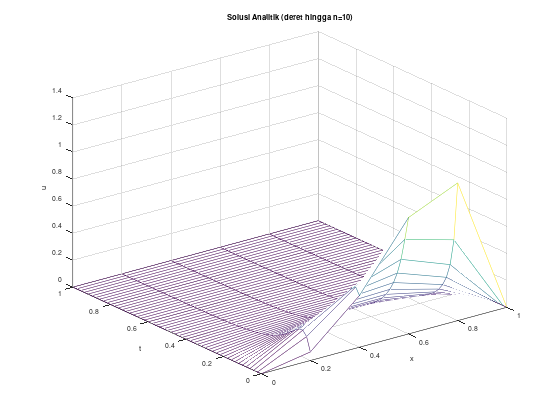

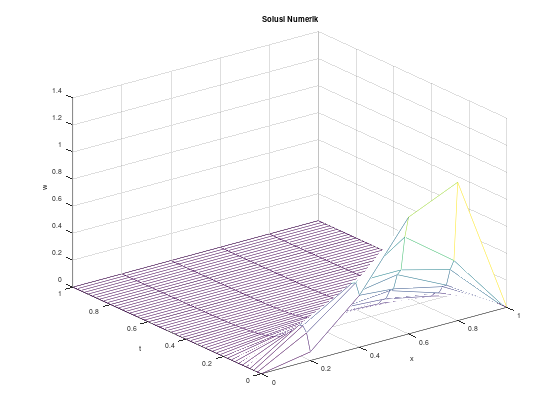

In [50]:
alph2 = 1;
f = @(x) 10 * x .^ 3 .* (1 - x);
lb = @(t) 0;
rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
h = 0.2;
k = 0.02;

[x, t, w] = parabolik_forward_fd(alph2, f, lb, rb, xb, xu, tb, tu, h, k);

u = zeros(length(x), length(t));
for i = 1 : length(x)
  for j = 1 : length(t)
    u(i, j) = 0;
    for n = 1 : 10
      F = @(x) x .^ 3 .* (1 - x) .* sin(n * pi .* x);
      cn = 20 * integral(F, 0, 1);
      u(i, j) += cn * exp(-n^2 * pi^2 .* t(j)) .* sin(n * pi .* x(i));
    endfor
  endfor
endfor

figure 1;
mesh(x, t, w');
title("Solusi Numerik");
xlabel("x");
ylabel("t");
zlabel("w");

figure 2;
mesh(x, t, u');
title("Solusi Analitik (deret hingga n=10)");
xlabel("x");
ylabel("t");
zlabel("u");

Alternatifnya, menggunakan bentuk matriks:

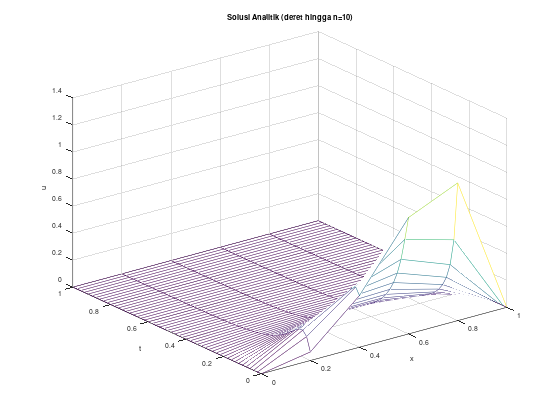

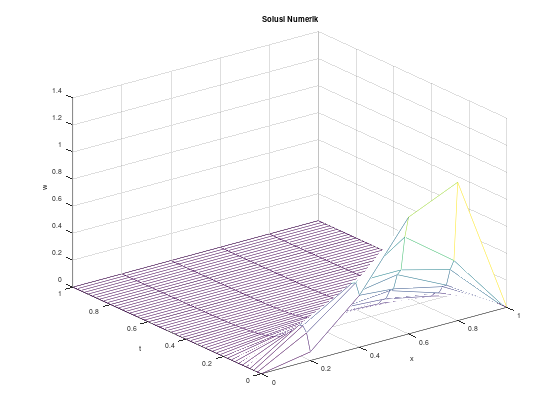

In [51]:
alph2 = 1;
f = @(x) 10 * x .^ 3 .* (1 - x);
lb = @(t) 0;
rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
h = 0.2;
k = 0.02;

[x, t, w] = parabolik_forward_matriks(alph2, f, lb, rb, xb, xu, tb, tu, h, k);

u = zeros(length(x), length(t));
for i = 1 : length(x)
  for j = 1 : length(t)
    u(i, j) = 0;
    for n = 1 : 10
      F = @(x) x .^ 3 .* (1 - x) .* sin(n * pi .* x);
      cn = 20 * integral(F, 0, 1);
      u(i, j) += cn * exp(-n^2 * pi^2 .* t(j)) .* sin(n * pi .* x(i));
    endfor
  endfor
endfor

figure 1;
mesh(x, t, w');
title("Solusi Numerik");
xlabel("x");
ylabel("t");
zlabel("w");

figure 2;
mesh(x, t, u');
title("Solusi Analitik (deret hingga n=10)");
xlabel("x");
ylabel("t");
zlabel("u");

Baik menggunakan pendekatan *finite difference* maupun bentuk matriks, Anda juga bisa menampilkan animasi persebaran suhu yang terus menurun, dengan menambahkan kode berikut di akhir *script file*:

In [ ]:
figure(3);
for j = 1:length(t)
  plot(x, u(:, j), 'k', 'linewidth', 1.5);
  ylim([0, 1.5]);
  title("Animasi solusi aproksimasi u(x, t) seiring berjalannya t");
  drawnow;
  pause(0.1);
endfor

### Contoh (tidak stabil) dengan $h = k = 0.2$

Menggunakan soal yang sama,

\begin{align*}
    u_t - u_{xx} &= 0, \quad 0 < x < 1, \quad t > 0 \\
    u(0,t) &= u(1,t) = 0, \quad t \le 0 \\
    u(x,0) &= 10x^3(1-x), \quad 0 \le x \le 1 \\
\end{align*}

Solusi eksak dari PDP tersebut adalah:

\begin{align*}
    u(x,t) &= \sum_{n=1}^{\infty} c_n e^{-n^2 \pi^2 t} \sin \left( n\pi x\right) \\
    c_n &= 20 \int_0^1 x^3 (1-x) \sin \left( n\pi x \right) dx, \quad n = 1, 2, \dots
\end{align*}

Perhatikan bahwa $\alpha^2 = 1$ sehingga

$$\lambda = \frac{\alpha^2 k}{h^2} = \frac{(1)(0.2)}{(0.2)^2} = \frac{0.2}{0.04} = 5 > \frac{1}{2}$$

Oleh karena itu, metode *forward difference* tidak dijamin stabil untuk pemilihan *step size* ini. Mari kita lihat.

Untuk pendekatan *finite difference*:

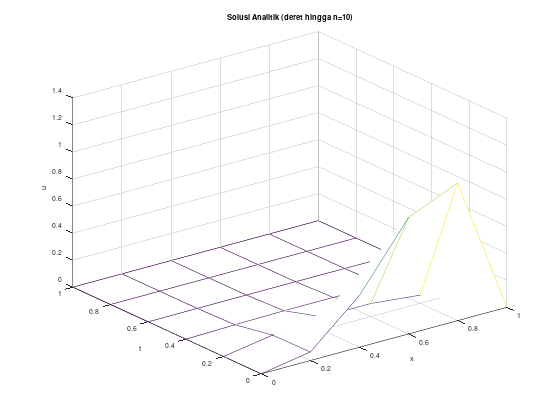

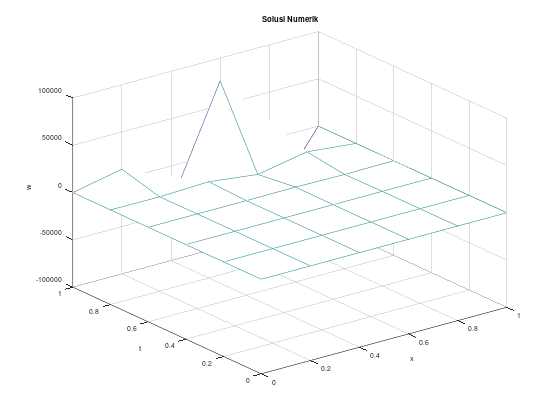

In [52]:
alph2 = 1;
f = @(x) 10 * x .^ 3 .* (1 - x);
lb = @(t) 0;
rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
h = 0.2;
k = 0.2;

[x, t, w] = parabolik_forward_fd(alph2, f, lb, rb, xb, xu, tb, tu, h, k);

u = zeros(length(x), length(t));
for i = 1 : length(x)
  for j = 1 : length(t)
    u(i, j) = 0;
    for n = 1 : 10
      F = @(x) x .^ 3 .* (1 - x) .* sin(n * pi .* x);
      cn = 20 * integral(F, 0, 1);
      u(i, j) += cn * exp(-n^2 * pi^2 .* t(j)) .* sin(n * pi .* x(i));
    endfor
  endfor
endfor

figure 1;
mesh(x, t, w');
title("Solusi Numerik");
xlabel("x");
ylabel("t");
zlabel("w");

figure 2;
mesh(x, t, u');
title("Solusi Analitik (deret hingga n=10)");
xlabel("x");
ylabel("t");
zlabel("u");

Untuk pendekatan bentuk matriks:

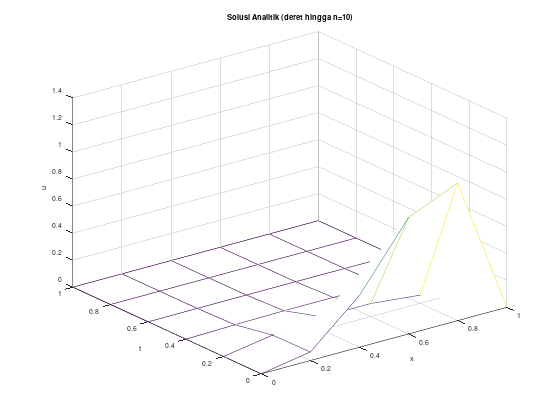

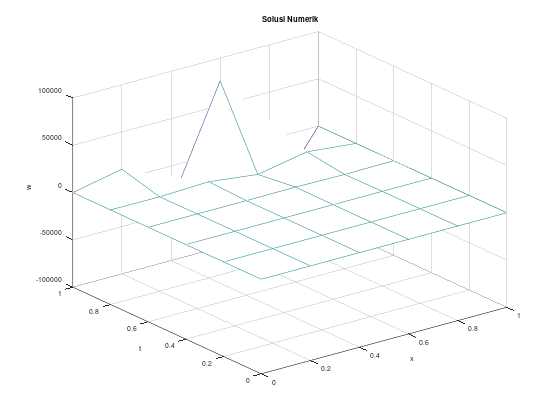

In [53]:
alph2 = 1;
f = @(x) 10 * x .^ 3 .* (1 - x);
lb = @(t) 0;
rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
h = 0.2;
k = 0.2;

[x, t, w] = parabolik_forward_matriks(alph2, f, lb, rb, xb, xu, tb, tu, h, k);

u = zeros(length(x), length(t));
for i = 1 : length(x)
  for j = 1 : length(t)
    u(i, j) = 0;
    for n = 1 : 10
      F = @(x) x .^ 3 .* (1 - x) .* sin(n * pi .* x);
      cn = 20 * integral(F, 0, 1);
      u(i, j) += cn * exp(-n^2 * pi^2 .* t(j)) .* sin(n * pi .* x(i));
    endfor
  endfor
endfor

figure 1;
mesh(x, t, w');
title("Solusi Numerik");
xlabel("x");
ylabel("t");
zlabel("w");

figure 2;
mesh(x, t, u');
title("Solusi Analitik (deret hingga n=10)");
xlabel("x");
ylabel("t");
zlabel("u");

## Metode *Backward Difference* untuk PDP Parabolik

### Ide utama

### *Function file* (dengan faktorisasi Crout sesuai *pseudocode*)

In [ ]:
function [x, t, w] = parabolik_backward_crout(d, f, lb, rb, xb, xu, tb, tu, dx, dt)
  x = xb:dx:xu;
  t = tb:dt:tu;
  nx = length(x);
  nt = length(t);

  % Nilai lambda
  lambd = (d * dt) / (dx^2);

  % Nilai awal dan syarat batas
  for i = 1:nx
    w(i, 1) = f(x(i));
  endfor

  for j = 2:nt
    w(1, j) = lb(t(j));
    w(nx, j) = rb(t(j));
  endfor

  % Penyelesaian SPL dengan faktorisasi Crout
  l(2) = 1 + 2*lambd;
  u(2) = -lambd / l(2);
  for i = 3:nx-2
    l(i) = 1 + 2*lambd + lambd*u(i-1);
    u(i) = -lambd / l(i);
  endfor
  l(nx-1) = 1 + 2*lambd + lambd*u(nx-2);
  for j = 2:nt
    z(2) = w(2, j-1) / l(2);
    for i = 3:nx-1
      z(i) = (w(i, j-1) + lambd*z(i-1)) / l(i);
    endfor
    w(nx-1, j) = z(nx-1);
    for i = nx-2:-1:2
      w(i, j) = z(i) - u(i)*w(i+1, j);
    endfor
  endfor
endfunction

### *Function file* (dengan solusi SPL secara langsung)

In [33]:
function [x, t, u] = parabolik_backward_langsung(alph2, f, lb, rb, xb, xu, tb, tu, h, k)
  x = xb : h : xu;
  t = tb : k : tu;
  m_plus_1 = length(x);
  N_plus_1 = length(t);
  u = zeros(m_plus_1, N_plus_1);

  lambd = (alph2 * k) / h^2;

  % memasang nilai awal
  for i = 1 : m_plus_1
    u(i, 1) = f(x(i));
  endfor

  % memasang syarat batas
  for j = 2 : N_plus_1
    u(1, j)         = lb(t(j));
    u(m_plus_1, j)  = rb(t(j));
  endfor

  % menyusun matriks A
  A = zeros(m_plus_1 - 2, m_plus_1 - 2);
  for i = 1 : (m_plus_1 - 2)
    % isi sebelah kiri/atas diagonal
    if (i > 1)
      A(i, i-1) = -lambd;
    endif

    % isi diagonal
    A(i, i) = 1 + 2 * lambd;

    % isi sebelah kanan/bawah diagonal
    if (i < m_plus_1 - 2)
      A(i, i+1) = -lambd;
    endif
  endfor

  % mengisi semua nilai lainnya dengan penyelesaian SPL
  for j = 2 : N_plus_1
    u(2 : m_plus_1 - 1, j) = A \ u(2 : m_plus_1 - 1, j-1);
  endfor
endfunction


### Contoh soal

Akan kita uji dengan persamaan difusi:

\begin{align*}
    u_t - u_{xx} &= 0, \quad 0 < x < 1, \quad t > 0, \\
    u(0,t) &= u(1,t) = 0, \quad t > 0, \\
    u(x,0) &= \sin \left(\pi x\right), \quad 0 \le x \le 1
\end{align*}

dengan solusi eksak:

$$u(x,t) = e^{-\pi^2 t} \sin \left(\pi x\right)$$

Kita batasi $t$ menjadi $0 \le t \le 1$ dan gunakan $\Delta x = 0.2$ dan $\Delta t = 0.2$, di mana kondisinya tidak stabil untuk metode eksplisit.

Menggunakan *function file* dari *pseudocode*:

In [ ]:
d = 1;
f = @(x) sin(pi*x);
lb = rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 0.5;
dx = 0.2;
dt = 0.2;

[x, t, w] = parabolik_backward_crout(d, f, lb, rb, xb, xu, tb, tu, dx, dt);

u = @(x, t) exp(-pi^2.*t) * sin(pi.*x);
for i = 1:length(x)
  for j = 1:length(t)
    ufig(i, j) = u(x(i), t(j));
  endfor
endfor

figure(1);
mesh(x, t, ufig');
xlabel("x");
ylabel("t");
zlabel("u");

figure(2);
mesh(x, t, w');
xlabel("x");
ylabel("t");
zlabel("u");

Menggunakan *function file* dengan solusi SPL secara langsung:

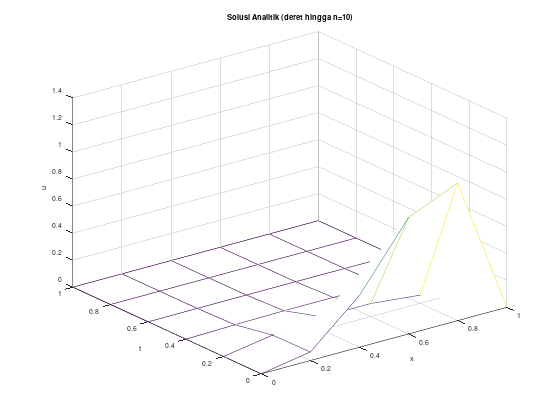

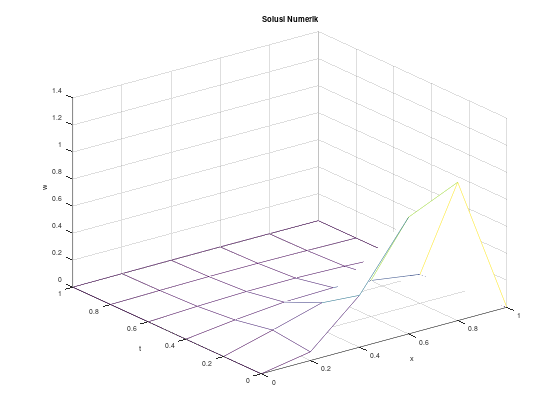

In [40]:
alph2 = 1;
f = @(x) 10 * x .^ 3 .* (1 - x);
lb = @(t) 0;
rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
h = 0.2;
k = 0.2;

[x, t, w] = parabolik_backward_langsung(alph2, f, lb, rb, xb, xu, tb, tu, h, k);

u = zeros(length(x), length(t));
for i = 1 : length(x)
  for j = 1 : length(t)
    u(i, j) = 0;
    for n = 1 : 10
      F = @(x) x .^ 3 .* (1 - x) .* sin(n * pi .* x);
      cn = 20 * integral(F, 0, 1);
      u(i, j) += cn * exp(-n^2 * pi^2 .* t(j)) .* sin(n * pi .* x(i));
    endfor
  endfor
endfor

figure 1;
mesh(x, t, w');
title("Solusi Numerik");
xlabel("x");
ylabel("t");
zlabel("w");

figure 2;
mesh(x, t, u');
title("Solusi Analitik (deret hingga n=10)");
xlabel("x");
ylabel("t");
zlabel("u");

## Metode Crack-Nicolson untuk PDP Parabolik

### Ide utama

### *Function file* (dengan faktorisasi Crout sesuai *pseudocode*)

In [57]:
function [x, t, w] = crank_nicolson_crout(d, f, lb, rb, xb, xu, tb, tu, dx, dt)
  x = xb:dx:xu;
  t = tb:dt:tu;
  nx = length(x);
  nt = length(t);

  % Nilai lambda
  lambd = (d * dt) / (dx^2);

  % Nilai awal dan syarat batas
  for i = 1:nx
    w(i, 1) = f(x(i));
  endfor

  for j = 2:nt
    w(1, j) = lb(t(j));
    w(nx, j) = rb(t(j));
  endfor

  % Penyelesaian SPL menggunakan faktorisasi Crout
  l(2) = 1 + lambd;
  u(2) = -lambd / (2*l(2));
  for i = 3:nx-2
    l(i) = 1 + lambd + (lambd*u(i-1))/2;
    u(i) = -lambd / (2*l(i));
  endfor
  l(nx-1) = 1 + lambd + (lambd*u(nx-2))/2;
  for j = 2:nt
    z(2) = ((1-lambd)*w(2, j-1) + (lambd/2)*w(3, j-1)) / l(2);
    for i = 3:nx-1
      z(i) = ((1-lambd)*w(i, j-1) + (lambd/2)*(w(i+1, j-1) + w(i-1, j-1) + z(i-
      1))) / l(i);
    endfor
    w(nx-1, j) = z(nx-1);
    for i = nx-2:-1:2
      w(i, j) = z(i) - u(i)*w(i+1, j);
    endfor
  endfor
endfunction

### *Function file* (dengan solusi SPL secara langsung)

In [58]:
function [x, t, w] = crank_nicolson_langsung(alph2, f, lb, rb, xb, xu, tb, tu, h, k)
  x = xb : h : xu;
  t = tb : k : tu;
  m_plus_1 = length(x);
  N_plus_1 = length(t);
  w = zeros(m_plus_1, N_plus_1);

  lambda = (alph2 * k) / h^2;

  % memasang nilai awal
  for i = 1 : m_plus_1
    w(i, 1) = f(x(i));
  endfor

  % memasang syarat batas
  for j = 2 : N_plus_1
    w(1, j)         = lb(t(j));
    w(m_plus_1, j)  = rb(t(j));
  endfor

  % menyusun matriks A
  A = zeros(m_plus_1 - 2, m_plus_1 - 2);
  for i = 1 : (m_plus_1 - 2)
    % isi sebelah kiri/atas diagonal
    if (i > 1)
      A(i, i-1) = -lambda/2;
    endif

    % isi diagonal
    A(i, i) = 1 + lambda;

    % isi sebelah kanan/bawah diagonal
    if (i < m_plus_1 - 2)
      A(i, i+1) = -lambda/2;
    endif
  endfor

  % menyusun matriks B
  B = zeros(m_plus_1 - 2, m_plus_1 - 2);
  for i = 1 : (m_plus_1 - 2)
    % isi sebelah kiri/atas diagonal
    if (i > 1)
      B(i, i-1) = lambda/2;
    endif

    % isi diagonal
    B(i, i) = 1 - lambda;

    % isi sebelah kanan/bawah diagonal
    if (i < m_plus_1 - 2)
      B(i, i+1) = lambda/2;
    endif
  endfor

  % penyelesaian Aw^(j) = Bw^(j-1)
  for j = 2 : N_plus_1
    z = B * w(2 : m_plus_1 - 1, j-1);
    w(2 : m_plus_1 - 1, j) = A \ z;
  endfor
endfunction

### Contoh 1

Sama seperti untuk *backward difference*, akan kita uji dengan persamaan difusi:

\begin{align*}
    u_t - u_{xx} &= 0, \quad 0 < x < 1, \quad t > 0, \\
    u(0,t) &= u(1,t) = 0, \quad t > 0, \\
    u(x,0) &= \sin \left(\pi x\right), \quad 0 \le x \le 1
\end{align*}

dengan solusi eksak:

$$u(x,t) = e^{-\pi^2 t} \sin \left(\pi x\right)$$

Kita batasi $t$ menjadi $0 \le t \le 1$ dan gunakan $\Delta x = 0.2$ dan $\Delta k = 0.2$, di mana kondisinya tidak stabil untuk metode eksplisit.

Menggunakan *function file* dari *pseudocode*:

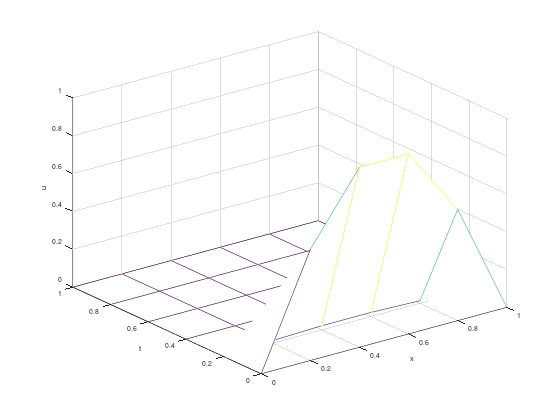

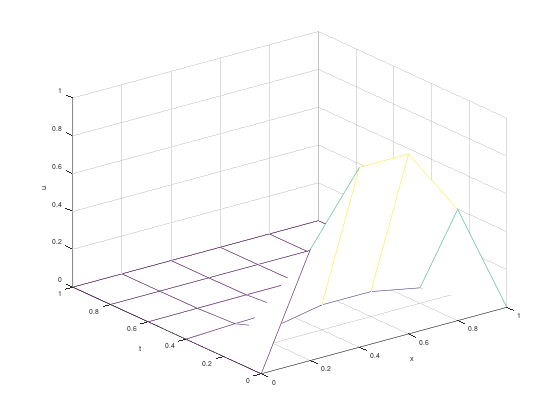

In [63]:
d = 1;
f = @(x) sin(pi*x);
lb = rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
dx = 0.2;
dt = 0.2;

[x, t, w] = crank_nicolson_crout(d, f, lb, rb, xb, xu, tb, tu, dx, dt);

u = @(x, t) exp(-pi^2.*t) * sin(pi.*x);
for i = 1:length(x)
  for j = 1:length(t)
    ufig(i, j) = u(x(i), t(j));
  endfor
endfor

figure(1);
mesh(x, t, ufig');
xlabel("x");
ylabel("t");
zlabel("u");

figure(2);
mesh(x, t, w');
xlabel("x");
ylabel("t");
zlabel("u");

Menggunakan *function file* dengan penyelesaian SPL secara langsung:

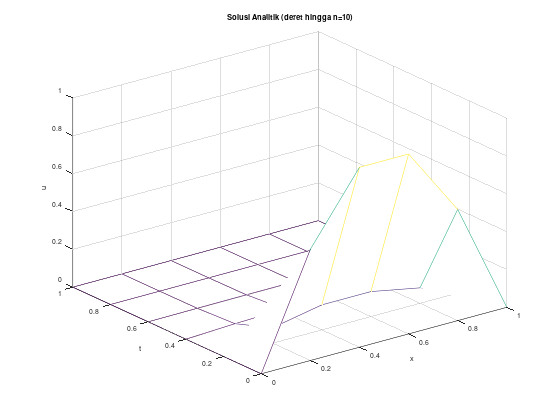

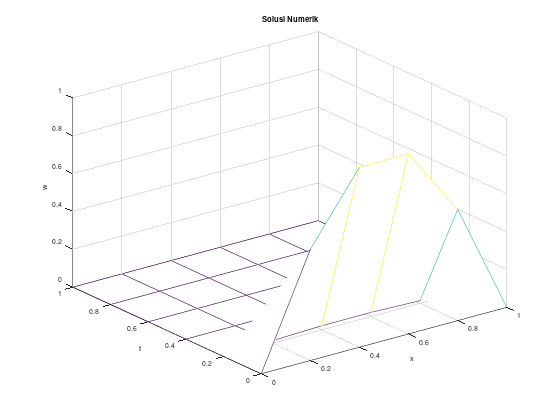

In [66]:
alph2 = 1;
f = @(x) sin(pi*x);
lb = @(t) 0;
rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
h = 0.2;
k = 0.2;

[x, t, w] = crank_nicolson_langsung(alph2, f, lb, rb, xb, xu, tb, tu, h, k);

u = zeros(length(x), length(t));
sln = @(x, t) exp(-pi^2.*t) * sin(pi.*x);
for i = 1:length(x)
  for j = 1:length(t)
    u(i, j) = sln(x(i), t(j));
  endfor
endfor

figure 1;
mesh(x, t, w');
title("Solusi Numerik");
xlabel("x");
ylabel("t");
zlabel("w");

figure 2;
mesh(x, t, u');
title("Solusi Analitik (deret hingga n=10)");
xlabel("x");
ylabel("t");
zlabel("u");


### Contoh 2

Akan kita uji menggunakan persamaan panas:

\begin{align*}
    u_t - u_{xx} &= 0, \quad 0 < x < 1, \quad t > 0 \\
    u(0,t) &= u(1,t) = 0, \quad t \le 0 \\
    u(x,0) &= 10x^3(1-x), \quad 0 \le x \le 1 \\
\end{align*}

Solusi eksak dari PDP tersebut adalah:

\begin{align*}
    u(x,t) &= \sum_{n=1}^{\infty} c_n e^{-n^2 \pi^2 t} \sin \left( n\pi x\right) \\
    c_n &= 20 \int_0^1 x^3 (1-x) \sin \left( n\pi x \right) dx, \quad n = 1, 2, \dots
\end{align*}

Menggunakan *function file* dengan solusi SPL secara langsung:

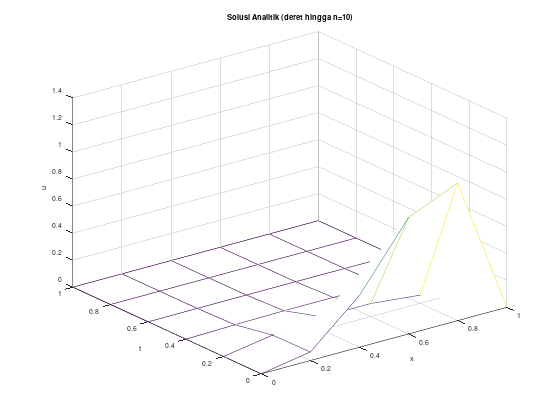

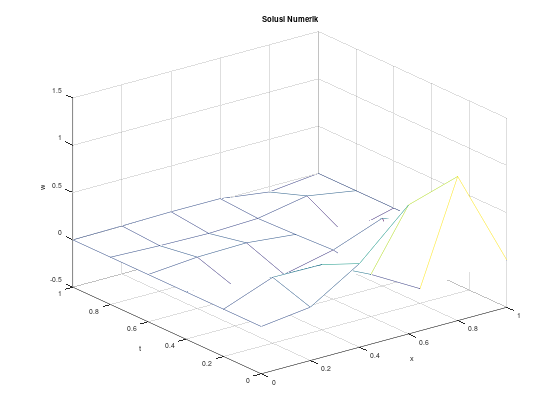

In [67]:
alph2 = 1;
f = @(x) 10 * x .^ 3 .* (1 - x);
lb = @(t) 0;
rb = @(t) 0;
xb = 0;
xu = 1;
tb = 0;
tu = 1;
h = 0.2;
k = 0.2;

[x, t, w] = crank_nicolson_langsung(alph2, f, lb, rb, xb, xu, tb, tu, h, k);

u = zeros(length(x), length(t));
for i = 1 : length(x)
  for j = 1 : length(t)
    u(i, j) = 0;
    for n = 1 : 10
      F = @(x) x .^ 3 .* (1 - x) .* sin(n * pi .* x);
      cn = 20 * integral(F, 0, 1);
      u(i, j) += cn * exp(-n^2 * pi^2 .* t(j)) .* sin(n * pi .* x(i));
    endfor
  endfor
endfor

figure 1;
mesh(x, t, w');
title("Solusi Numerik");
xlabel("x");
ylabel("t");
zlabel("w");

figure 2;
mesh(x, t, u');
title("Solusi Analitik (deret hingga n=10)");
xlabel("x");
ylabel("t");
zlabel("u");